Chest X Ray model to Cardiomegaly. 

In [2]:
#Essential libraries for data visualization and Deep learning
import os
import cv2
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Model, layers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.regularizers import l2

Using TensorFlow backend.


In [3]:
DIR = '/Users/neeharikasinha/Documents/datascience-course/CXR2/'
SIZE = 64
TARGET_SIZE = (SIZE, SIZE)

The image augmentaion process and split the data in validation and train test from the list provided in the NIH
website.

In [4]:

train_datagen = ImageDataGenerator( 
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=False,
    rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    DIR + '/train',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE)
 
val_datagen = ImageDataGenerator(rescale=1.0/255)
 
val_generator = val_datagen.flow_from_directory(
    DIR + '/val',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    DIR + '/test',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE,shuffle=False)

Found 39148 images belonging to 2 classes.
Found 13059 images belonging to 2 classes.
Found 10930 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'normal': 0, 'pcardiomegaly': 1}

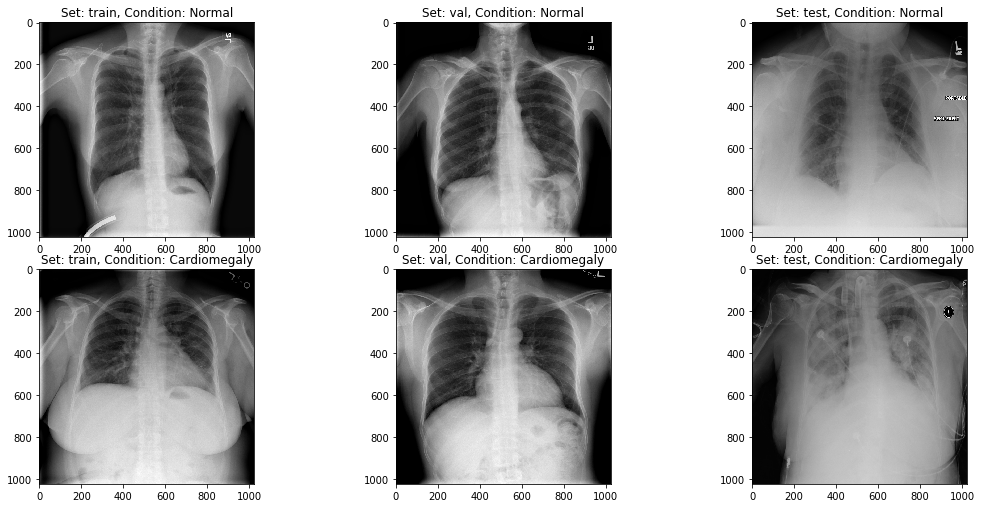

In [6]:
# code to print the images and see if there are any specific visual analysis. 
input_path = '/Users/neeharikasinha/Documents/datascience-course/CXR2/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/normal/'+os.listdir(set_path+'/normal')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/pcardiomegaly/'+os.listdir(set_path+'/pcardiomegaly')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Cardiomegaly'.format(_set))

Applied model including CNN 

In [7]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(SIZE, SIZE, 3), name="conv1"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name="conv2"))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', name="conv3"))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', name="conv4"))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', name="conv5"))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', name="conv6"))
model.add(Dropout(0.25))
model.add(Conv2D(8, kernel_size=(5, 5), activation='relu', name="conv7"))
model.add(Conv2D(8, kernel_size=(5, 5), activation='relu', name="conv8"))
model.add(Dropout(0.25))
model.add(Conv2D(4, kernel_size=(7, 7), activation='relu', name="conv9"))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dense(2, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2 (Conv2D)               (None, 60, 60, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 58, 58, 32)        18464     
_________________________________________________________________
conv4 (Conv2D)               (None, 56, 56, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv5 (Conv2D)               (None, 52, 52, 16)       

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.000035),
              metrics=['accuracy'])

In [10]:
class_weight = {0: 3, 1: 100}

In [11]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=53, epochs=70, validation_data=val_generator, validation_steps=6, use_multiprocessing=True, class_weight=class_weight) 



Epoch 1/70
53/53 [==============================] - 156s 3s/step - loss: 6.1251 - accuracy: 0.0594 - val_loss: 2.3879 - val_accuracy: 0.0300
Epoch 2/70
53/53 [==============================] - 148s 3s/step - loss: 6.0835 - accuracy: 0.0370 - val_loss: 2.3618 - val_accuracy: 0.0367
Epoch 3/70
53/53 [==============================] - 155s 3s/step - loss: 5.8244 - accuracy: 0.3006 - val_loss: 2.2594 - val_accuracy: 0.6933
Epoch 4/70
53/53 [==============================] - 170s 3s/step - loss: 5.7522 - accuracy: 0.5015 - val_loss: 2.5515 - val_accuracy: 0.0433
Epoch 5/70
53/53 [==============================] - 140s 3s/step - loss: 5.6770 - accuracy: 0.5125 - val_loss: 2.2734 - val_accuracy: 0.3050
Epoch 6/70
53/53 [==============================] - 137s 3s/step - loss: 5.5065 - accuracy: 0.4957 - val_loss: 2.2698 - val_accuracy: 0.4133
Epoch 7/70
53/53 [==============================] - 136s 3s/step - loss: 5.5579 - accuracy: 0.5995 - val_loss: 2.1973 - val_accuracy: 0.5383
Epoch 8/70
53

Epoch 59/70
53/53 [==============================] - 136s 3s/step - loss: 4.5520 - accuracy: 0.6268 - val_loss: 1.5007 - val_accuracy: 0.7317
Epoch 60/70
53/53 [==============================] - 136s 3s/step - loss: 4.3880 - accuracy: 0.6532 - val_loss: 1.3944 - val_accuracy: 0.7650
Epoch 61/70
53/53 [==============================] - 136s 3s/step - loss: 4.7038 - accuracy: 0.5911 - val_loss: 1.3968 - val_accuracy: 0.7583
Epoch 62/70
53/53 [==============================] - 137s 3s/step - loss: 4.3067 - accuracy: 0.6617 - val_loss: 1.3643 - val_accuracy: 0.7750
Epoch 63/70
53/53 [==============================] - 135s 3s/step - loss: 4.7328 - accuracy: 0.6115 - val_loss: 1.4610 - val_accuracy: 0.7267
Epoch 64/70
53/53 [==============================] - 136s 3s/step - loss: 4.3003 - accuracy: 0.6743 - val_loss: 1.4687 - val_accuracy: 0.7400
Epoch 65/70
53/53 [==============================] - 135s 3s/step - loss: 4.5537 - accuracy: 0.6385 - val_loss: 1.4164 - val_accuracy: 0.7200
Epoch 

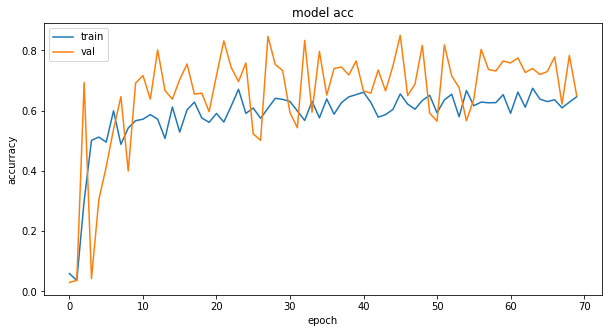

In [12]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accurracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

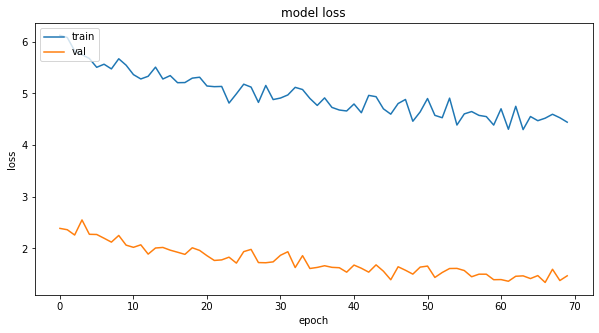

In [13]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate_generator(val_generator, steps=6, verbose=0)
print('val loss:', score[0]*100)
print('val accuracy:', score[1]*100)

val loss: 147.2972869873047
val accuracy: 70.6666648387909


The model is able to achieve an accuracy of 97.67% which is quite good considering the size of data that is used

In [15]:
model.save('CXR_model')

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("Cardiomegalycalssification.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Cardiomegalycalssification.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
true_labels = test_generator.classes
predictions = model.predict(test_generator,steps=len(test_generator), verbose=1)

110/110 [==============================] - 173s 2s/step


In [18]:
y_pred=predictions.argmax(axis=1)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix


acc = accuracy_score(true_labels, np.round(y_pred))*100
cm = confusion_matrix(true_labels, np.round(y_pred))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[5450 4411]
 [ 168  901]]

TEST METRICS ----------------------
Accuracy: 58.106129917657825%
Precision: 16.96159638554217%
Recall: 84.2843779232928%
F1-score: 28.240087760539105

TRAIN METRIC ----------------------
Train acc: 64.62


In [28]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [29]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_labels, y_pred)

In [30]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

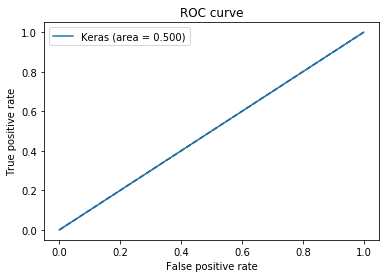

In [31]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()